In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import timedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
measurement = Base.classes.measurement
station= Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(measurement.date)).scalar()
print (recent_date)

2017-08-23


Date One Year Ago: 2016-08-23
            Date  Precipitation
0     2016-08-23           0.00
1     2016-08-23           0.15
2     2016-08-23           0.05
3     2016-08-23            NaN
4     2016-08-23           0.02
...          ...            ...
2225  2017-08-22           0.50
2226  2017-08-23           0.00
2227  2017-08-23           0.00
2228  2017-08-23           0.08
2229  2017-08-23           0.45

[2230 rows x 2 columns]


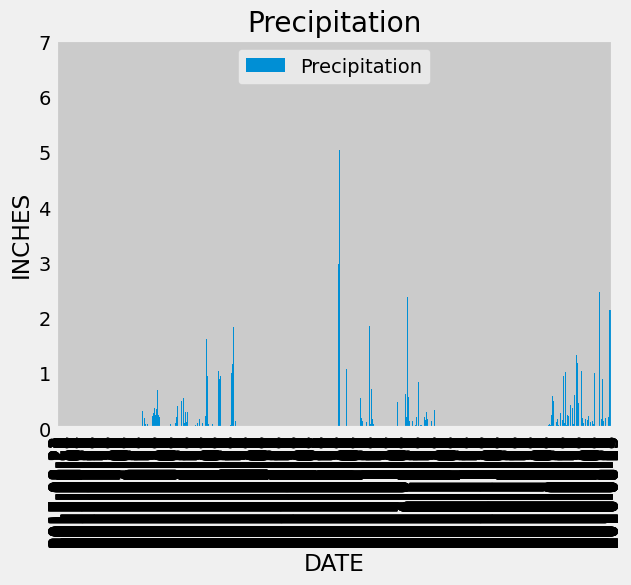

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
recent_date = dt.date(2017, 8, 23)  # Replace with your query

# Subtract a year from the most recent date
one_year_ago = recent_date - dt.timedelta(days=365)
print("Date One Year Ago:", one_year_ago)
# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp) \
    .filter(measurement.date >= one_year_ago) \
    .filter(measurement.date <= recent_date) \
    .order_by(measurement.date) \
    .all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names


column_names = ["Date", "Precipitation"]

# Create a Pandas DataFrame with explicit column names
df = pd.DataFrame(results, columns=column_names)
print (df)
# Sort the dataframe by date
df = df.sort_values(by="Date", ascending=False)
df = df.reset_index(drop=True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='Date', y='Precipitation', kind='bar')
plt.title( 'Precipitation')
plt.xlabel('DATE')
plt.ylabel('INCHES')
plt.show()


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
print(df.describe())

       Precipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset

num_stations = session.query(station.station).count()

print("Number of stations:", num_stations)


Number of stations: 9


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

station_counts = session.query(measurement.station, func.count().label('Count')).group_by(measurement.station).order_by(func.count().desc()).all()
results = station_counts
for result in results:
    station_name = result[0]
    count = result[1]
    print(f"Station: {station_name}, Count: {count}")

Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [14]:
# Using the most active station id from the previous query, 
#calculate the lowest, highest, and average temperature.
station_id = 'USC00519281'

# Specify the columns you want to calculate statistics on
station_filter = measurement.station
temp_numbers = measurement.tobs

# Query to filter rows and calculate statistics
query = session.query(
    func.min(temp_numbers).label('min_value'),
    func.max(temp_numbers).label('max_value'),
    func.avg(temp_numbers).label('avg_value')
).filter(station_filter == station_id)

# Execute the query and fetch the results
result = query.one()

# Print the calculated statistics
min_value = result.min_value
max_value = result.max_value
avg_value = result.avg_value

print(f"Lowest Temp: {min_value}")
print(f"Highest Temp: {max_value}")
print(f"Average Temp: {avg_value}")



Lowest Temp: 54.0
Highest Temp: 85.0
Average Temp: 71.66378066378067


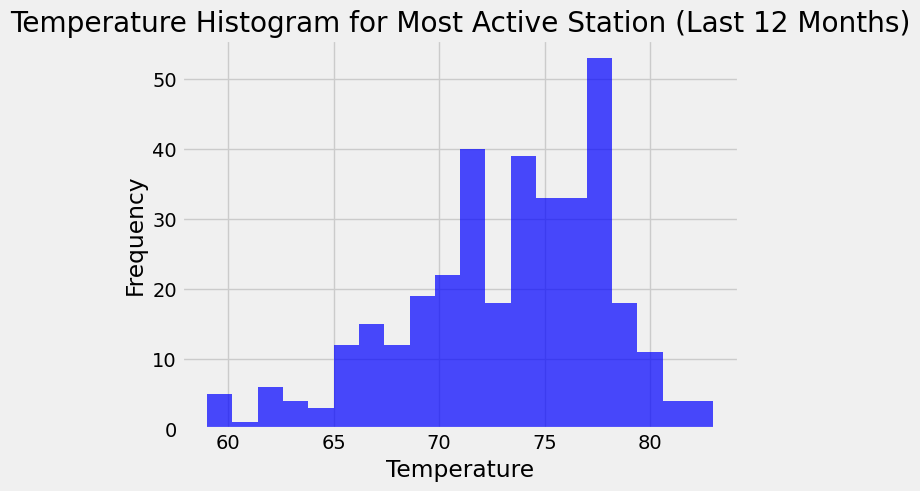

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 
#and plot the results as a histogram
recent_date
one_year_ago



query = session.query(measurement.tobs).filter(
    measurement.date>= one_year_ago,
    measurement.date <= recent_date,
    measurement.station == station_id
)

# Step 4: Execute the query and fetch the data
results = query
values = [result.tobs for result in results]
# Step 5: Create a histogram plot using Matplotlib
plt.hist(values, bins=20, color='blue', alpha=0.7)
plt.title(f'Temperature Histogram for Most Active Station (Last 12 Months)')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [16]:
# Close Session
session.close()